# Project: Predicting the final concentration of Gold gotten from Gold Ore Purification 

We have been given data consisting of the parameters measured during the purificarion process of gold ore like the concentrations at different stages, bank levels and others. We will be predicting the concentrations of gold after the 1st and final stages of purification 

# Table of Contents
- [General Information](#step1)
- [Analysis](#step2)
- [Building the Model](#step3)
- [Conclusion](#step4)

## General Information <a name="step1"></a>

Let us import the necessary libraries and modules:

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn.linear_model import LinearRegression
from sklearn.tree import DecisionTreeRegressor
from sklearn.ensemble import RandomForestRegressor
from numpy.random import RandomState
from sklearn.metrics import mean_absolute_error
from sklearn.model_selection import cross_val_score
from sklearn.preprocessing import StandardScaler
from sklearn.metrics import make_scorer
STATE=12345

We can now read the files and save them as Dataframes

In [2]:
train=pd.read_csv('/datasets/gold_recovery_train.csv', index_col='date')
#saves the gold_recovery_train.csv files as train making the date column the index
test=pd.read_csv('/datasets/gold_recovery_test.csv', index_col='date')
#saves the gold_recovery_test.csv files as test making the date column the index
full=pd.read_csv('/datasets/gold_recovery_full.csv', index_col='date')
#saves the gold_recovery_full.csv files as full making the date column the index

In [3]:
train.head() #first 5 rows of train

,final.output.concentrate_ag,final.output.concentrate_pb,final.output.concentrate_sol,final.output.concentrate_au,final.output.recovery,final.output.tail_ag,final.output.tail_pb,final.output.tail_sol,final.output.tail_au,primary_cleaner.input.sulfate,...,secondary_cleaner.state.floatbank4_a_air,secondary_cleaner.state.floatbank4_a_level,secondary_cleaner.state.floatbank4_b_air,secondary_cleaner.state.floatbank4_b_level,secondary_cleaner.state.floatbank5_a_air,secondary_cleaner.state.floatbank5_a_level,secondary_cleaner.state.floatbank5_b_air,secondary_cleaner.state.floatbank5_b_level,secondary_cleaner.state.floatbank6_a_air,secondary_cleaner.state.floatbank6_a_level
date,,,,,,,,,,,,,,,,,,,,,
2016-01-15 00:00:00,6.055403,9.889648,5.507324,42.192020,70.541216,10.411962,0.895447,16.904297,2.143149,127.092003,...,14.016835,-502.488007,12.099931,-504.715942,9.925633,-498.310211,8.079666,-500.470978,14.151341,-605.841980
2016-01-15 01:00:00,6.029369,9.968944,5.257781,42.701629,69.266198,10.462676,0.927452,16.634514,2.224930,125.629232,...,13.992281,-505.503262,11.950531,-501.331529,10.039245,-500.169983,7.984757,-500.582168,13.998353,-599.787184
2016-01-15 02:00:00,6.055926,10.213995,5.383759,42.657501,68.116445,10.507046,0.953716,16.208849,2.257889,123.819808,...,14.015015,-502.520901,11.912783,-501.133383,10.070913,-500.129135,8.013877,-500.517572,14.028663,-601.427363
2016-01-15 03:00:00,6.047977,9.977019,4.858634,42.689819,68.347543,10.422762,0.883763,16.532835,2.146849,122.270188,...,14.036510,-500.857308,11.999550,-501.193686,9.970366,-499.201640,7.977324,-500.255908,14.005551,-599.996129
2016-01-15 04:00:00,6.148599,10.142511,4.939416,42.774141,66.927016,10.360302,0.792826,16.525686,2.055292,117.988169,...,14.027298,-499.838632,11.953070,-501.053894,9.925709,-501.686727,7.894242,-500.356035,13.996647,-601.496691


In [4]:
train.info() #general info about train

<class 'pandas.core.frame.DataFrame'>
Index: 16860 entries, 2016-01-15 00:00:00 to 2018-08-18 10:59:59
Data columns (total 86 columns):
final.output.concentrate_ag                           16788 non-null float64
final.output.concentrate_pb                           16788 non-null float64
final.output.concentrate_sol                          16490 non-null float64
final.output.concentrate_au                           16789 non-null float64
final.output.recovery                                 15339 non-null float64
final.output.tail_ag                                  16794 non-null float64
final.output.tail_pb                                  16677 non-null float64
final.output.tail_sol                                 16715 non-null float64
final.output.tail_au                                  16794 non-null float64
primary_cleaner.input.sulfate                         15553 non-null float64
primary_cleaner.input.depressant                      15598 non-null float64
primary_cleaner.i

We can notice some missing values in some columns

In [5]:
test.head()

,primary_cleaner.input.sulfate,primary_cleaner.input.depressant,primary_cleaner.input.feed_size,primary_cleaner.input.xanthate,primary_cleaner.state.floatbank8_a_air,primary_cleaner.state.floatbank8_a_level,primary_cleaner.state.floatbank8_b_air,primary_cleaner.state.floatbank8_b_level,primary_cleaner.state.floatbank8_c_air,primary_cleaner.state.floatbank8_c_level,...,secondary_cleaner.state.floatbank4_a_air,secondary_cleaner.state.floatbank4_a_level,secondary_cleaner.state.floatbank4_b_air,secondary_cleaner.state.floatbank4_b_level,secondary_cleaner.state.floatbank5_a_air,secondary_cleaner.state.floatbank5_a_level,secondary_cleaner.state.floatbank5_b_air,secondary_cleaner.state.floatbank5_b_level,secondary_cleaner.state.floatbank6_a_air,secondary_cleaner.state.floatbank6_a_level
date,,,,,,,,,,,,,,,,,,,,,
2016-09-01 00:59:59,210.800909,14.993118,8.080000,1.005021,1398.981301,-500.225577,1399.144926,-499.919735,1400.102998,-500.704369,...,12.023554,-497.795834,8.016656,-501.289139,7.946562,-432.317850,4.872511,-500.037437,26.705889,-499.709414
2016-09-01 01:59:59,215.392455,14.987471,8.080000,0.990469,1398.777912,-500.057435,1398.055362,-499.778182,1396.151033,-499.240168,...,12.058140,-498.695773,8.130979,-499.634209,7.958270,-525.839648,4.878850,-500.162375,25.019940,-499.819438
2016-09-01 02:59:59,215.259946,12.884934,7.786667,0.996043,1398.493666,-500.868360,1398.860436,-499.764529,1398.075709,-502.151509,...,11.962366,-498.767484,8.096893,-500.827423,8.071056,-500.801673,4.905125,-499.828510,24.994862,-500.622559
2016-09-01 03:59:59,215.336236,12.006805,7.640000,0.863514,1399.618111,-498.863574,1397.440120,-499.211024,1400.129303,-498.355873,...,12.033091,-498.350935,8.074946,-499.474407,7.897085,-500.868509,4.931400,-499.963623,24.948919,-498.709987
2016-09-01 04:59:59,199.099327,10.682530,7.530000,0.805575,1401.268123,-500.808305,1398.128818,-499.504543,1402.172226,-500.810606,...,12.025367,-500.786497,8.054678,-500.397500,8.107890,-509.526725,4.957674,-500.360026,25.003331,-500.856333


In [6]:
test.info()

<class 'pandas.core.frame.DataFrame'>
Index: 5856 entries, 2016-09-01 00:59:59 to 2017-12-31 23:59:59
Data columns (total 52 columns):
primary_cleaner.input.sulfate                 5554 non-null float64
primary_cleaner.input.depressant              5572 non-null float64
primary_cleaner.input.feed_size               5856 non-null float64
primary_cleaner.input.xanthate                5690 non-null float64
primary_cleaner.state.floatbank8_a_air        5840 non-null float64
primary_cleaner.state.floatbank8_a_level      5840 non-null float64
primary_cleaner.state.floatbank8_b_air        5840 non-null float64
primary_cleaner.state.floatbank8_b_level      5840 non-null float64
primary_cleaner.state.floatbank8_c_air        5840 non-null float64
primary_cleaner.state.floatbank8_c_level      5840 non-null float64
primary_cleaner.state.floatbank8_d_air        5840 non-null float64
primary_cleaner.state.floatbank8_d_level      5840 non-null float64
rougher.input.feed_ag                         584

We can notice some missing values here also

In [7]:
full.head()

,final.output.concentrate_ag,final.output.concentrate_pb,final.output.concentrate_sol,final.output.concentrate_au,final.output.recovery,final.output.tail_ag,final.output.tail_pb,final.output.tail_sol,final.output.tail_au,primary_cleaner.input.sulfate,...,secondary_cleaner.state.floatbank4_a_air,secondary_cleaner.state.floatbank4_a_level,secondary_cleaner.state.floatbank4_b_air,secondary_cleaner.state.floatbank4_b_level,secondary_cleaner.state.floatbank5_a_air,secondary_cleaner.state.floatbank5_a_level,secondary_cleaner.state.floatbank5_b_air,secondary_cleaner.state.floatbank5_b_level,secondary_cleaner.state.floatbank6_a_air,secondary_cleaner.state.floatbank6_a_level
date,,,,,,,,,,,,,,,,,,,,,
2016-01-15 00:00:00,6.055403,9.889648,5.507324,42.192020,70.541216,10.411962,0.895447,16.904297,2.143149,127.092003,...,14.016835,-502.488007,12.099931,-504.715942,9.925633,-498.310211,8.079666,-500.470978,14.151341,-605.841980
2016-01-15 01:00:00,6.029369,9.968944,5.257781,42.701629,69.266198,10.462676,0.927452,16.634514,2.224930,125.629232,...,13.992281,-505.503262,11.950531,-501.331529,10.039245,-500.169983,7.984757,-500.582168,13.998353,-599.787184
2016-01-15 02:00:00,6.055926,10.213995,5.383759,42.657501,68.116445,10.507046,0.953716,16.208849,2.257889,123.819808,...,14.015015,-502.520901,11.912783,-501.133383,10.070913,-500.129135,8.013877,-500.517572,14.028663,-601.427363
2016-01-15 03:00:00,6.047977,9.977019,4.858634,42.689819,68.347543,10.422762,0.883763,16.532835,2.146849,122.270188,...,14.036510,-500.857308,11.999550,-501.193686,9.970366,-499.201640,7.977324,-500.255908,14.005551,-599.996129
2016-01-15 04:00:00,6.148599,10.142511,4.939416,42.774141,66.927016,10.360302,0.792826,16.525686,2.055292,117.988169,...,14.027298,-499.838632,11.953070,-501.053894,9.925709,-501.686727,7.894242,-500.356035,13.996647,-601.496691


In [8]:
full.info()

<class 'pandas.core.frame.DataFrame'>
Index: 22716 entries, 2016-01-15 00:00:00 to 2018-08-18 10:59:59
Data columns (total 86 columns):
final.output.concentrate_ag                           22627 non-null float64
final.output.concentrate_pb                           22629 non-null float64
final.output.concentrate_sol                          22331 non-null float64
final.output.concentrate_au                           22630 non-null float64
final.output.recovery                                 20753 non-null float64
final.output.tail_ag                                  22633 non-null float64
final.output.tail_pb                                  22516 non-null float64
final.output.tail_sol                                 22445 non-null float64
final.output.tail_au                                  22635 non-null float64
primary_cleaner.input.sulfate                         21107 non-null float64
primary_cleaner.input.depressant                      21170 non-null float64
primary_cleaner.i

"Full" contains both "train" and "test". Missing values also observed

### Verifying the rougher output recovery calculation in the train set

We will first of all drop all null values from the train set

In [9]:
train_mae = train.dropna() #drops all null values from the train set
train_mae.info()

<class 'pandas.core.frame.DataFrame'>
Index: 11017 entries, 2016-01-15 00:00:00 to 2018-08-18 10:59:59
Data columns (total 86 columns):
final.output.concentrate_ag                           11017 non-null float64
final.output.concentrate_pb                           11017 non-null float64
final.output.concentrate_sol                          11017 non-null float64
final.output.concentrate_au                           11017 non-null float64
final.output.recovery                                 11017 non-null float64
final.output.tail_ag                                  11017 non-null float64
final.output.tail_pb                                  11017 non-null float64
final.output.tail_sol                                 11017 non-null float64
final.output.tail_au                                  11017 non-null float64
primary_cleaner.input.sulfate                         11017 non-null float64
primary_cleaner.input.depressant                      11017 non-null float64
primary_cleaner.i

Now we can calculate the rougher output recovery using the formula in the project description and compare it to the already existing rougher.output.recovery column of the DataFrame

In [10]:
C = train_mae['rougher.output.concentrate_au']
F = train_mae['rougher.input.feed_au']
T = train_mae['rougher.output.tail_au']
train_mae['recovery'] = ((C * (F - T)) / ((F * (C - T)))) * 100
display(train_mae['recovery'].head())
display(train_mae['rougher.output.recovery'].head())

/opt/conda/lib/python3.7/site-packages/ipykernel_launcher.py:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  after removing the cwd from sys.path.


date
2016-01-15 00:00:00    87.107763
2016-01-15 01:00:00    86.843261
2016-01-15 02:00:00    86.842308
2016-01-15 03:00:00    87.226430
2016-01-15 04:00:00    86.688794
Name: recovery, dtype: float64

date
2016-01-15 00:00:00    87.107763
2016-01-15 01:00:00    86.843261
2016-01-15 02:00:00    86.842308
2016-01-15 03:00:00    87.226430
2016-01-15 04:00:00    86.688794
Name: rougher.output.recovery, dtype: float64

We can then calculate the mean absolute error between what we calcucated and the existin recovery column

In [11]:
MAE = np.sum(np.abs(train_mae['recovery'] - train_mae['rougher.output.recovery']))/\
len(train_mae['rougher.output.recovery'])
print(MAE)

9.555596961987514e-15


The mean absolute error is negligeable since it is very insignificant. So we can conclude that the rougher.output.recovery values are correct 

### Features not available in the test set

We will compare the train set to the test set by looping through the list of columns in the train set and finding those that are not in the test set

In [12]:
df_temp=pd.DataFrame() #creating a temporary dataframe
for col in list(train.columns):#loops through the list of columns in the train set
    if col not in list(test.columns):#if the column can't be found in the test set
        df_temp[col]=train[col]#adds the column from our train set to the temporary dataframe
        
df_temp.info()#general info on the temporary dataframe

<class 'pandas.core.frame.DataFrame'>
Index: 16860 entries, 2016-01-15 00:00:00 to 2018-08-18 10:59:59
Data columns (total 34 columns):
final.output.concentrate_ag                           16788 non-null float64
final.output.concentrate_pb                           16788 non-null float64
final.output.concentrate_sol                          16490 non-null float64
final.output.concentrate_au                           16789 non-null float64
final.output.recovery                                 15339 non-null float64
final.output.tail_ag                                  16794 non-null float64
final.output.tail_pb                                  16677 non-null float64
final.output.tail_sol                                 16715 non-null float64
final.output.tail_au                                  16794 non-null float64
primary_cleaner.output.concentrate_ag                 16778 non-null float64
primary_cleaner.output.concentrate_pb                 16502 non-null float64
primary_cleaner.o

The test set is lacking 13 parameters from the rougher stage, 8 parameters from the primary cleaner stage, 4 parameters from the secondary cleaner stage, and 9 parameters from the final stage to make a total of 34 parameters

### Preprocessing

To fill the missing values, we will use forward filling since the values of the features next to each other in terms of time are often similar

In [13]:
#forward fills missing values along the observations
train = train.fillna(method='ffill', axis=0) 
test = test.fillna(method='ffill', axis=0)
full = full.fillna(method='ffill', axis=0)

## Analysis <a name="step2"></a>

### Concentrations of Au, Ag, and Pb depending on purification stage

We will plot histograms to show each metal's concentrations throughout each purification stage. Firstly, Gold (Au):

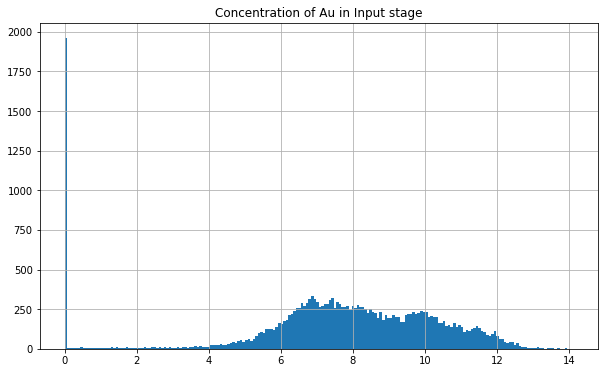

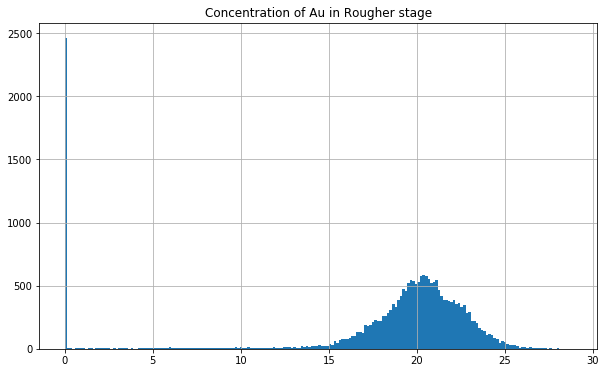

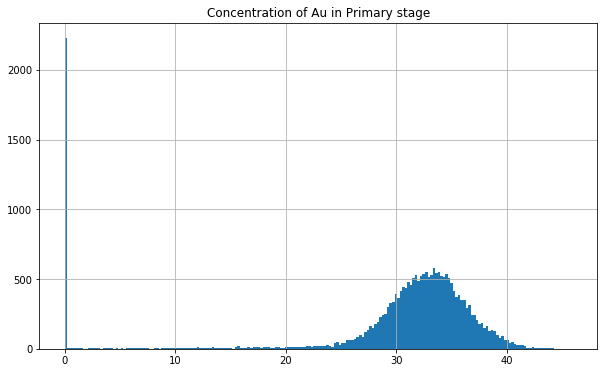

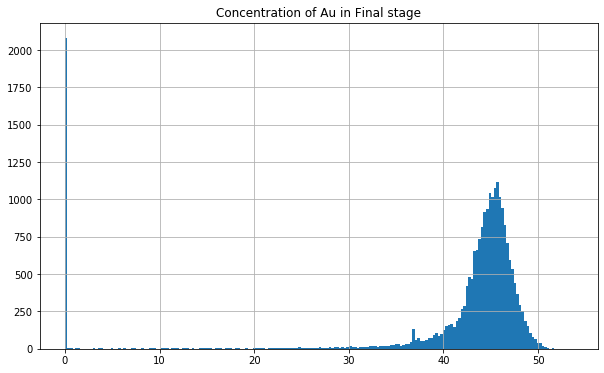

In [14]:
au_inputs = [('rougher.input.feed_au', 'Input'), ('rougher.output.concentrate_au', 'Rougher') \
          ,('primary_cleaner.output.concentrate_au', 'Primary'), ('final.output.concentrate_au', 'Final')]
#creates a list of input lists
for i in au_inputs:#loops through the inputs
    full[i[0]].hist(bins=200, figsize=(10, 6))#plots a histogram
    plt.title('Concentration of Au in {} stage'.format(i[1]))#Titles the histogram
    plt.show()#shows the plot

Gold concentrations are highest in the final stage which makes sense. The concentrations decrease as we revert tbackwards to the input stage. However, we notice a lot of zero values in each case. Secondly, Silver (Ag); we will follow the same manner:

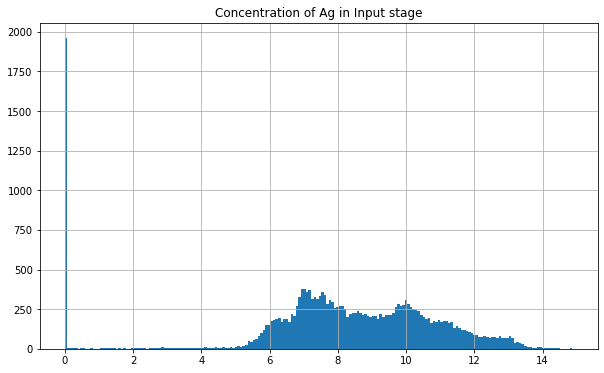

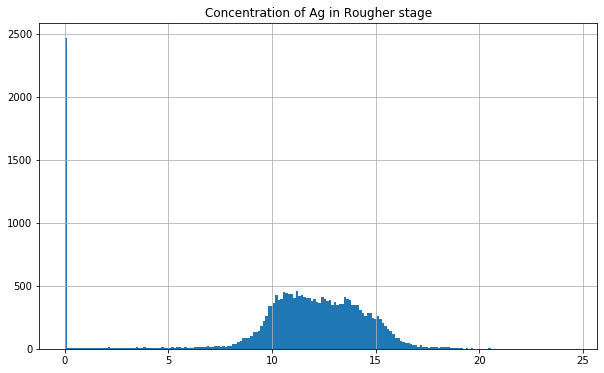

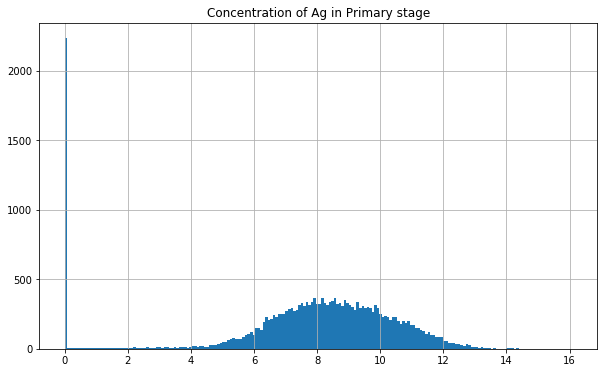

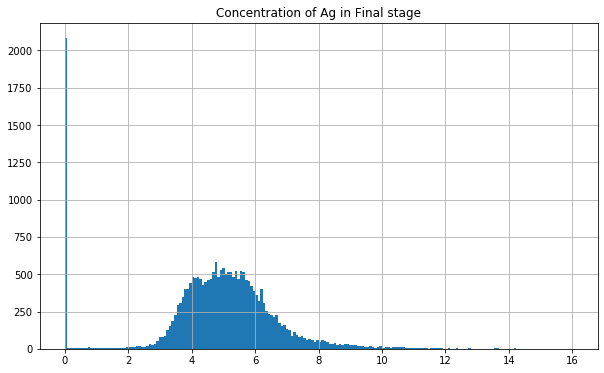

In [15]:
ag_inputs = [('rougher.input.feed_ag', 'Input'), ('rougher.output.concentrate_ag', 'Rougher') \
          ,('primary_cleaner.output.concentrate_ag', 'Primary'), ('final.output.concentrate_ag', 'Final')]
for i in ag_inputs:
    full[i[0]].hist(bins=200, figsize=(10, 6))
    plt.title('Concentration of Ag in {} stage'.format(i[1]))
    plt.show()

Silver concentrations are higher in the final stage, followed by the rougher stage, the primary cleaner stage and the input stage. Again, a lot of zero values. Lastly, Lead (Pb):

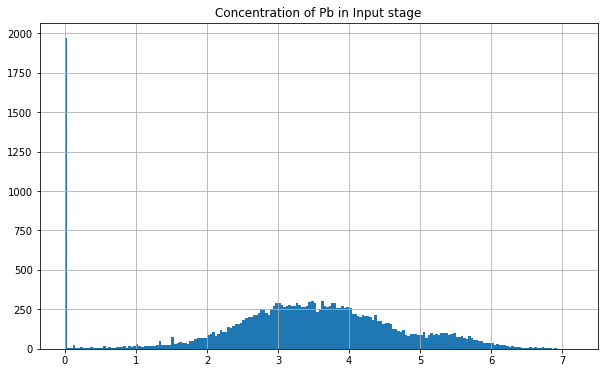

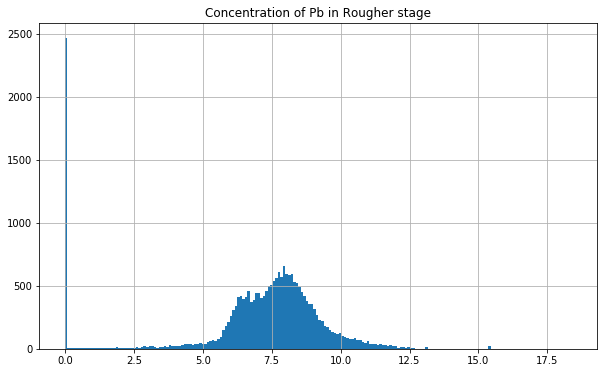

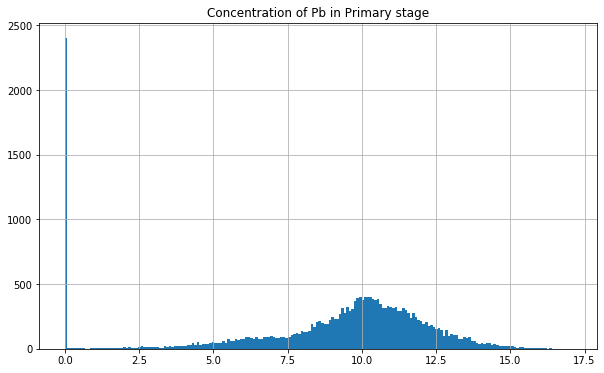

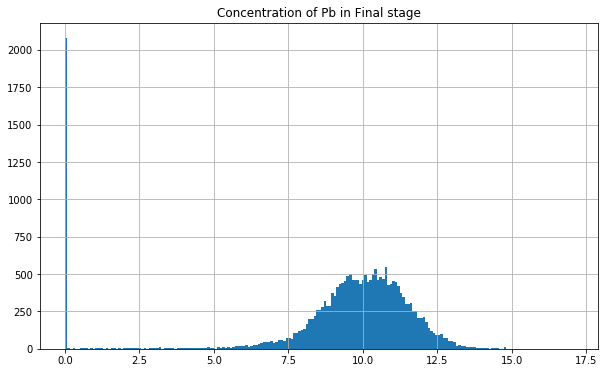

In [16]:
pb_inputs = [('rougher.input.feed_pb', 'Input'), ('rougher.output.concentrate_pb', 'Rougher') \
          ,('primary_cleaner.output.concentrate_pb', 'Primary'), ('final.output.concentrate_pb', 'Final')]
for i in pb_inputs:
    full[i[0]].hist(bins=200, figsize=(10, 6))
    plt.title('Concentration of Pb in {} stage'.format(i[1]))
    plt.show()

Lead concentrations are highest in the rougher stage, followed by the final stage, then come the primary cleaner and input stages. A lot of zero values again

### Feed Particle size distributions

We will compare feed size distributions for the train and test sets

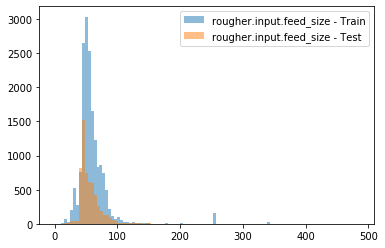

In [17]:
plt.hist(train['rougher.input.feed_size'], bins=100, alpha=0.5, label='rougher.input.feed_size - Train')
#plots the histogram for the feed size in the train set
plt.hist(test['rougher.input.feed_size'], bins=100, alpha=0.5, label='rougher.input.feed_size - Test')
#plots the histogram for the feed size  in the test set
plt.legend(loc='upper right')#inserts a legend in the diagram
plt.show()#shows the plots

Apart from minor differences, we can say the distributions are similar, so we are good on that end

### Total concentrations of all metals at different stages

For each stage, we will get the concentrations of all the substances and group them

In [18]:
input_concentrate = ['rougher.input.feed_au', 'rougher.input.feed_ag', 'rougher.input.feed_pb'\
                              , 'rougher.input.feed_sol']
#input concentrations of all substances
rougher_concentrate = ['rougher.output.concentrate_au', 'rougher.output.concentrate_ag'\
                                , 'rougher.output.concentrate_pb', 'rougher.output.concentrate_sol']
#rougher concentrations of all substances
output_concentrate = ['final.output.concentrate_au', 'final.output.concentrate_ag'\
                               , 'final.output.concentrate_pb', 'final.output.concentrate_sol']
#final concentrations of all substances

#add the values along the same observations
input_sum=full[input_concentrate].sum(axis=1).reset_index()
rougher_sum=full[rougher_concentrate].sum(axis=1).reset_index()
output_sum=full[output_concentrate].sum(axis=1).reset_index()

We can then plot histograms for the sums. First Input:

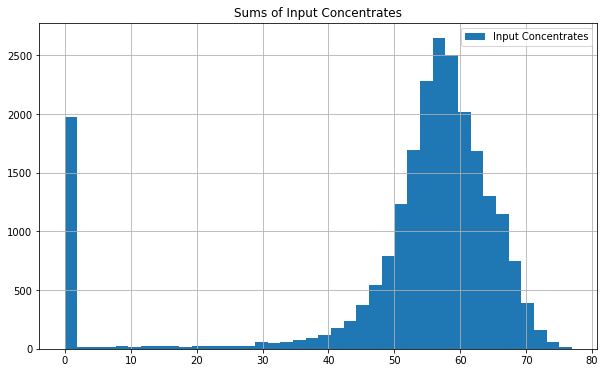

In [19]:
input_sum.hist(bins=40, label='Input Concentrates', figsize=(10, 6))
plt.title('Sums of Input Concentrates')
plt.legend(loc='upper right')
plt.show()

We notice total concentrations of zero. This isn't normal because, that would suggest nothing was inserted. Next up, Rougher:

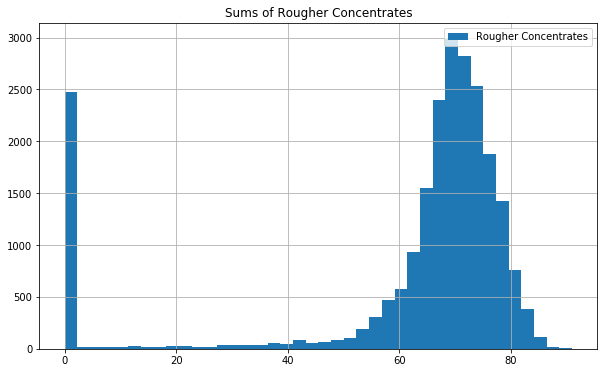

In [20]:
rougher_sum.hist(bins=40, label='Rougher Concentrates', figsize=(10, 6))
plt.title('Sums of Rougher Concentrates')
plt.legend(loc='upper right')
plt.show()

We notice zero values again in this case. Lastly, Final Output:

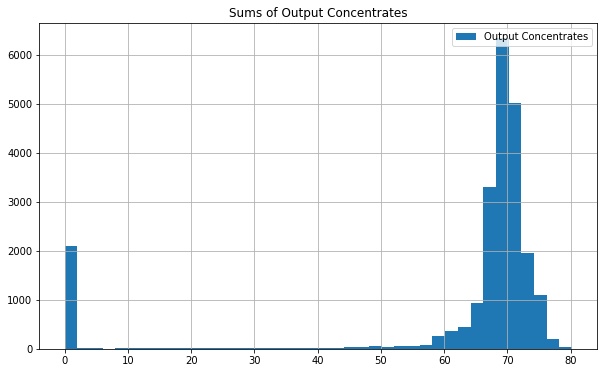

In [21]:
output_sum.hist(bins=40, label='Output Concentrates', figsize=(10, 6))
plt.title('Sums of Output Concentrates')
plt.legend(loc='upper right')
plt.show()

Another batch of zero values. The total concentrations increase through the stages, which makes sense. But we have to remove the zero values because they are outliers

In [22]:
#sum of concentrations at each stage must be greater than 0
train_model=train[train[rougher_concentrate].sum(axis=1)>0]
train_model=train[train[output_concentrate].sum(axis=1)>0]
train_model=train[train[input_concentrate].sum(axis=1)>0]
train_model.info()

<class 'pandas.core.frame.DataFrame'>
Index: 15647 entries, 2016-01-15 00:00:00 to 2018-08-18 10:59:59
Data columns (total 86 columns):
final.output.concentrate_ag                           15647 non-null float64
final.output.concentrate_pb                           15647 non-null float64
final.output.concentrate_sol                          15647 non-null float64
final.output.concentrate_au                           15647 non-null float64
final.output.recovery                                 15647 non-null float64
final.output.tail_ag                                  15647 non-null float64
final.output.tail_pb                                  15647 non-null float64
final.output.tail_sol                                 15647 non-null float64
final.output.tail_au                                  15647 non-null float64
primary_cleaner.input.sulfate                         15647 non-null float64
primary_cleaner.input.depressant                      15647 non-null float64
primary_cleaner.i

Now we can identify our targets in the train set:

In [23]:
train_targets = train_model[['rougher.output.recovery', 'final.output.recovery']]
train_targets.shape

(15647, 2)

Since the test set has less features, we will make our train features the columns that appear in the test set: 

In [24]:
train_features = train_model.loc[:, list(test.columns)]
train_features.shape

(15647, 52)

For the test set, we will have to get information concerning rougher.output.recovery', 'final.output.recovery', 'rougher.output.concentrate_au', 'rougher.output.concentrate_ag', 'rougher.output.concentrate_pb', 'rougher.output.concentrate_sol', 'final.output.concentrate_au', 'final.output.concentrate_ag', 'final.output.concentrate_pb', 'final.output.concentrate_sol' which are missing from it. We can get this information from the full set. We do this so that we can later eliminate the outliers.

In [25]:
subset = ['rougher.output.recovery', 'final.output.recovery', 'rougher.output.concentrate_au', 
          'rougher.output.concentrate_ag', 'rougher.output.concentrate_pb', 'rougher.output.concentrate_sol',
         'final.output.concentrate_au', 'final.output.concentrate_ag', 'final.output.concentrate_pb',
          'final.output.concentrate_sol']
#collects names of missing columns from test set that we need to eliminate outliers
sub_full = full.loc[:, list(subset)] #gets data from those columns in the full set
sub_full.head()

,rougher.output.recovery,final.output.recovery,rougher.output.concentrate_au,rougher.output.concentrate_ag,rougher.output.concentrate_pb,rougher.output.concentrate_sol,final.output.concentrate_au,final.output.concentrate_ag,final.output.concentrate_pb,final.output.concentrate_sol
date,,,,,,,,,,
2016-01-15 00:00:00,87.107763,70.541216,19.793808,11.500771,7.101074,28.029297,42.192020,6.055403,9.889648,5.507324
2016-01-15 01:00:00,86.843261,69.266198,20.050975,11.615865,7.278807,28.067063,42.701629,6.029369,9.968944,5.257781
2016-01-15 02:00:00,86.842308,68.116445,19.737170,11.695753,7.216833,27.454037,42.657501,6.055926,10.213995,5.383759
2016-01-15 03:00:00,87.226430,68.347543,19.320810,11.915047,7.175616,27.341277,42.689819,6.047977,9.977019,4.858634
2016-01-15 04:00:00,86.688794,66.927016,19.216101,12.411054,7.240205,27.041023,42.774141,6.148599,10.142511,4.939416


Now we can merge the information to our test set, matching on the date

In [26]:
test_new = test.merge(sub_full, on = 'date')
test_new.shape

(5856, 62)

We remove outliers:

In [27]:
#sum of concentrates at each stage must be greater than zero
test_model=test_new[test_new[rougher_concentrate].sum(axis=1)>0]
test_model=test_new[test_new[input_concentrate].sum(axis=1)>0]
test_model=test_new[test_new[output_concentrate].sum(axis=1)>0]
test_model.info()

<class 'pandas.core.frame.DataFrame'>
Index: 5505 entries, 2016-09-01 00:59:59 to 2017-12-31 23:59:59
Data columns (total 62 columns):
primary_cleaner.input.sulfate                 5505 non-null float64
primary_cleaner.input.depressant              5505 non-null float64
primary_cleaner.input.feed_size               5505 non-null float64
primary_cleaner.input.xanthate                5505 non-null float64
primary_cleaner.state.floatbank8_a_air        5505 non-null float64
primary_cleaner.state.floatbank8_a_level      5505 non-null float64
primary_cleaner.state.floatbank8_b_air        5505 non-null float64
primary_cleaner.state.floatbank8_b_level      5505 non-null float64
primary_cleaner.state.floatbank8_c_air        5505 non-null float64
primary_cleaner.state.floatbank8_c_level      5505 non-null float64
primary_cleaner.state.floatbank8_d_air        5505 non-null float64
primary_cleaner.state.floatbank8_d_level      5505 non-null float64
rougher.input.feed_ag                         550

We can now define our test targets:

In [28]:
test_targets = test_model[['rougher.output.recovery', 'final.output.recovery']]
test_targets.shape

(5505, 2)

For our features, we want only the columns present in our original test set:

In [29]:
test_features = test_model.loc[:, list(test.columns)]
test_features.shape

(5505, 52)

We have successfully analyzed metal concentrations throughout the stages, particle feed size, total concentrations though different stages and we have eliminated outliers.

## Building a Model <a name="step3"></a>

Let us first of all write our sMAPE function according to the formula we were given after which we will make it the metric which we will use to pick the best model. Since it is a calculation of percentage error, the closer the value is to 0, the better

In [30]:
def finalsMAPE(targ, pred): #creates a function called finalSMAPE that target and predictions as arguments
    sMAPE_rougher = (np.mean((np.abs(targ.iloc[:,0] - pred[:, 0]) /\
                              ((np.abs(targ.iloc[:,0]) + np.abs(pred[:,0])) / 2))) * 100)
    #rougher stage sMAPE formula
    sMAPE_final = (np.mean((np.abs(targ.iloc[:,1] - pred[:, 1]) /\
                            ((np.abs(targ.iloc[:,1]) + np.abs(pred[:,1])) / 2))) * 100)
    #final stage sMAPE formula
    final_sMAPE = sMAPE_rougher * 0.25 + sMAPE_final * 0.75 #final sMAPE formula
    return final_sMAPE

sMAPE_score = make_scorer(finalsMAPE, greater_is_better = False)
#makes finalsMAPE formula the scorer for our models, the smaller the better since it is a measure of error

We can now train models and check their scores. First up, Linear Regression:

In [31]:
LR = LinearRegression()
LR_score = cross_val_score(LR, train_features, train_targets, scoring=sMAPE_score, cv=5)
#scores the LR model trained with the train features and targets using the sMAPE, with 5 folds 
print(LR_score.mean()) #prints the mean of the scores

-14.933947375582875


Secondly, Decision Tree. We will find which max depth works best:

In [32]:
for depth in range(1,11):#loops throu max_depth values from 1-10
    DTR = DecisionTreeRegressor(max_depth=depth, random_state=STATE)
    DTR_score = cross_val_score(DTR, train_features, train_targets, scoring=sMAPE_score, cv=5)
    print('Max_Depth=', depth, ':', DTR_score.mean())

Max_Depth= 1 : -13.466059406828453
Max_Depth= 2 : -13.00223250653122
Max_Depth= 3 : -13.003889723133488
Max_Depth= 4 : -13.547953448686636
Max_Depth= 5 : -15.083113721980363
Max_Depth= 6 : -15.684285514867218
Max_Depth= 7 : -14.717516763626378
Max_Depth= 8 : -16.321387733521192
Max_Depth= 9 : -17.462823861573703
Max_Depth= 10 : -17.794141563116675


Lastly, Random Forest. We have to find the combination of max_depth and n_estimators that works best.

In [40]:
for depth in range(1, 11):
    RFR = RandomForestRegressor(n_estimators=20, max_depth=depth, random_state = STATE)
    RFR_score = cross_val_score(RFR, train_features, train_targets, scoring=sMAPE_score, cv=5)
    print('Max_Depth=', depth, ':', RFR_score.mean())

Max_Depth= 1 : -13.314628035704411
Max_Depth= 2 : -12.517087105677106
Max_Depth= 3 : -12.274483707422998
Max_Depth= 4 : -11.876194742750243
Max_Depth= 5 : -12.053961426204793
Max_Depth= 6 : -12.014553171220346
Max_Depth= 7 : -12.278681909562296
Max_Depth= 8 : -12.466998853450573
Max_Depth= 9 : -12.592201821762707
Max_Depth= 10 : -13.092949783102943


Out of all these models, the one that works best is the Random Forest Regressor with a max depth of 4 and 20 estimators. So we can now go ahead and train the model with scaled features then test it on the test set.

In [44]:
#scaling
scaler = StandardScaler()#scaler function
scaler.fit_transform(train_features)#fits the scaled features from the train set
scaler.transform(test_features)#scales the test features

array([[ 1.80026927,  1.71899855,  1.2696192 , ..., -0.18403615,
         1.24045636,  0.21281566],
       [ 1.9012442 ,  1.71748443,  1.2696192 , ..., -0.1862399 ,
         0.96491853,  0.21070278],
       [ 1.89833015,  1.15367308,  0.79039697, ..., -0.18035093,
         0.96081996,  0.19527974],
       ...,
       [ 0.92797262,  1.98730408,  1.2532817 , ..., -0.18408925,
        -1.65618602,  0.2496781 ],
       [ 1.11625144,  1.83855966,  1.2532817 , ..., -0.18228047,
        -1.65118146,  0.20427243],
       [ 1.15714897,  1.71973116,  1.2532817 , ..., -0.18933044,
        -1.65510837,  0.19254553]])

Final testing:

In [45]:
model = RandomForestRegressor(n_estimators=20, max_depth=4, random_state = STATE)
#Random Forest Regression model with 20 estimators and max_depth 4
model.fit(train_features, train_targets)#training the model with the scaled features and target
predictions = model.predict(test_features)#gets predictions based on test features 
print(finalsMAPE(test_targets, predictions))#prints final sMAPE 

9.038896628729505


## Conclusion <a name="step4"></a>
We did the following:
- Analyzed metal concentrations through the different purification stages and found that Lead concentrations are highest in the rougher stage, followed by the final stage, then come the primary cleaner and input stages; Silver concentrations are higher in the final stage, followed by the rougher stage, the primary cleaner stage and the input stage; and Gold kept a steady increase moving from one stage to another, same as the total concentrations
- Analyzed the particle feed size distributions for the train and test set and found them to be similar
- Tested models and picked the best model being the Random Forest Regressor with max depth 4 and 20 estimators which had a Final sMAPE value of 9.04%